# Title: Student Peformance on Entrance Exams

`Author:` [Saifullah Haider](https://www.kaggle.com/saifullah007)\
 `Date:` 14.Mar.2024\
 `Dataset:` [Student Performance Dataset Kaggle](https://www.kaggle.com/datasets/adilshamim8/student-performance-on-an-entrance-examination)


## Meta-Data (About Dataset)

## Context

This dataset contains comprehensive information regarding candidates' performance in a common entrance examination, alongside various demographic and academic indicators. It is designed to support analysis into the factors influencing success in competitive exams and can serve as a valuable resource for educational researchers and data scientists.

## Content

### Key Features:
 
- `Examination Performance`(Data reflecting the candidate’s results in the entrance examination)
#### Candidate Demographics:
- `Sex`(Gender of the candidate)
- `Caste` (Caste classification of the candidate)
- `Coaching Details`
- (Information on whether the candidate attended coaching classes within Assam, outside Assam, or did not attend any coaching)
#### Educational Background:
- `Board Details` (Names of the boards where the candidate studied during Class X and Class XII)
- `Medium of Instruction` (The medium used for teaching during Class XII)
- `Academic Performance:`
- `Class X Percentage` (Marks secured at the Class X level)
- `Class XII Percentage` (Marks secured at the Class XII level)
- `Parental Occupation`
- (Occupation details for both the candidate's father and mother, which can help analyze socioeconomic influences on performance)

### Use Cases:

- Performance Analysis: Examine correlations between educational background, coaching, and exam performance.
- Predictive Modeling: Develop models to predict exam outcomes based on prior academic results and demographic factors.
- Educational Research: Explore the impact of socio-economic and educational variables on academic success.
- This dataset is ideal for conducting in-depth studies into the determinants of academic achievement and for designing interventions to improve student performance in competitive exams.


## Aims and Objective:

We will this after doing some exploratory Data Analysis (EDA).


### Import Libraries

Let`s start the project by importing all the libraries we will need inthis project


In [1]:
# import libraries
# 1.To handle the data
import pandas as pd  
import numpy as np
# 2.To visaulize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dta
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,TargetEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#Machine Learning
from sklearn.model_selection import train_test_split
# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier # type: ignore
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
# ignore Warning
import warnings
warnings.filterwarnings('ignore')


### Load the Dataset

In [2]:
# load the dta from csv file placed locally in our pc
df=pd.read_csv('Student_Performance_on_an_Entrance_Examination.csv')
# print hte first 5 row of the datframe
df.head()


,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent


## Exploratory Data Analysis (EDA)

### Explore each Column

In [3]:
#Explore the datatype of each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [4]:
# data shape
df.shape

(666, 12)

In [5]:
# data columns
df.columns

Index(['Gender', 'Caste', 'coaching', 'Class_ten_education',
       'twelve_education', 'medium', 'Class_X_Percentage',
       'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation',
       'time', 'Performance'],
      dtype='object')

In [6]:
#Gender column values finding
df['Gender'].value_counts()

Gender
male      355
female    311
Name: count, dtype: int64

In [7]:
# finding missing values in whole dataset
df.isnull().sum()

Gender                  0
Caste                   0
coaching                0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
time                    0
Performance             0
dtype: int64

In [8]:
df1 = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female'],
                   'Caste': ['General', 'OBC', 'SC', 'ST'],
                   'medium': ['ENGLISH', 'OTHERS', 'ENGLISH', 'OTHERS']})

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform categorical columns
encoded_array = ohe.fit_transform(df[['Gender', 'Caste', 'medium']])

# Convert NumPy array to DataFrame with column names
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out())

# Concatenate encoded columns with the original DataFrame (after dropping original categorical columns)
df_encoded = pd.concat([df.drop(columns=['Gender', 'Caste', 'medium']), encoded_df], axis=1)

print(df_encoded)


    coaching Class_ten_education twelve_education Class_X_Percentage  \
0         NO                SEBA            AHSEC          Excellent   
1         WA                SEBA            AHSEC          Excellent   
2         OA              OTHERS             CBSE          Excellent   
3         WA                SEBA            AHSEC          Excellent   
4         OA                SEBA             CBSE          Excellent   
..       ...                 ...              ...                ...   
661       WA                SEBA            AHSEC               Good   
662       WA                SEBA            AHSEC                 Vg   
663       WA                SEBA             CBSE               Good   
664       WA                SEBA            AHSEC               Good   
665       NO                SEBA             CBSE                 Vg   

    Class_XII_Percentage Father_occupation Mother_occupation   time  \
0              Excellent            DOCTOR            OTHERS    

In [9]:
df_encoded.columns

Index(['coaching', 'Class_ten_education', 'twelve_education',
       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation', 'time', 'Performance', 'Gender_male', 'Caste_OBC',
       'Caste_SC', 'Caste_ST', 'medium_ENGLISH', 'medium_OTHERS'],
      dtype='object')

In [10]:

# Copy the dataframe to apply encoding
df_encoded = df.copy()

# Apply Label Encoding to ordinal features
ordinal_cols = ["Class_X_Percentage", "Class_XII_Percentage", "Performance"]
label_encoders = {}

for col in ordinal_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Apply One-Hot Encoding to nominal categorical columns
nominal_cols = ["medium", "time"]
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

# Apply Frequency Encoding to high-cardinality columns
high_card_cols = ["Father_occupation", "Mother_occupation"]
for col in high_card_cols:
    df_encoded[col] = df_encoded[col].map(df_encoded[col].value_counts())

# Display the processed dataset
df_encoded.head()


print(df)

     Gender    Caste coaching Class_ten_education twelve_education   medium  \
0      male  General       NO                SEBA            AHSEC  ENGLISH   
1      male      OBC       WA                SEBA            AHSEC   OTHERS   
2      male      OBC       OA              OTHERS             CBSE  ENGLISH   
3      male  General       WA                SEBA            AHSEC   OTHERS   
4      male  General       OA                SEBA             CBSE  ENGLISH   
..      ...      ...      ...                 ...              ...      ...   
661  female       ST       WA                SEBA            AHSEC  ENGLISH   
662    male       ST       WA                SEBA            AHSEC  ENGLISH   
663    male       ST       WA                SEBA             CBSE  ENGLISH   
664    male       ST       WA                SEBA            AHSEC  ENGLISH   
665  female       ST       NO                SEBA             CBSE  ENGLISH   

    Class_X_Percentage Class_XII_Percentage Father_

In [11]:
df_encoded.head()

,Gender,Caste,coaching,Class_ten_education,twelve_education,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,Performance,medium_ENGLISH,medium_OTHERS,time_FOUR,time_ONE,time_SEVEN,time_THREE,time_TWO
0,male,General,NO,SEBA,AHSEC,1,1,55,72,1,True,False,False,True,False,False,False
1,male,OBC,WA,SEBA,AHSEC,1,1,109,442,1,False,True,False,False,False,False,True
2,male,OBC,OA,OTHERS,CBSE,1,1,103,442,1,True,False,False,False,False,False,True
3,male,General,WA,SEBA,AHSEC,1,1,109,108,1,False,True,False,True,False,False,False
4,male,General,OA,SEBA,CBSE,1,1,27,442,1,True,False,False,False,False,False,True


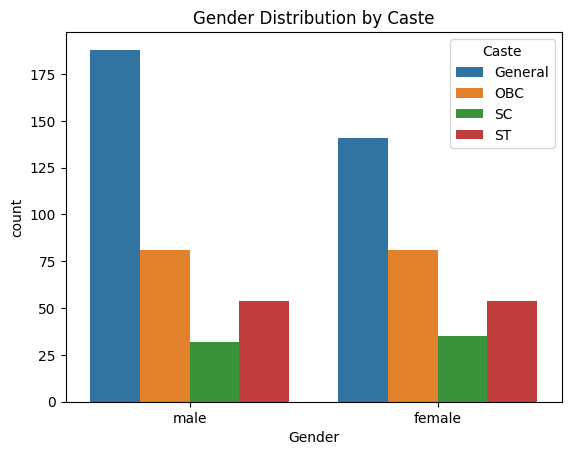

In [12]:
sns.countplot(x='Gender', hue='Caste', data=df)
plt.title("Gender Distribution by Caste")
plt.show()



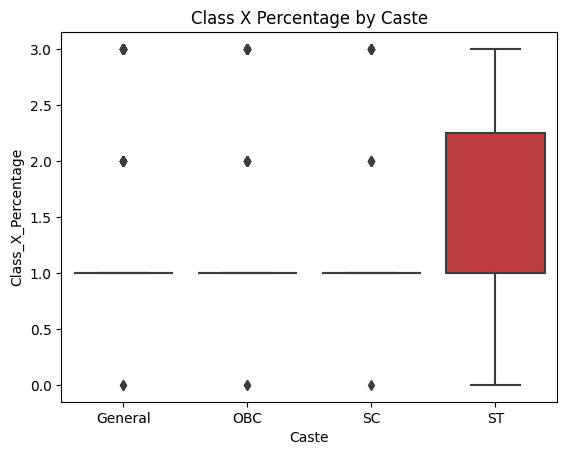

In [13]:
sns.boxplot(x='Caste', y='Class_X_Percentage', data=df_encoded)
plt.title("Class X Percentage by Caste")
plt.show()


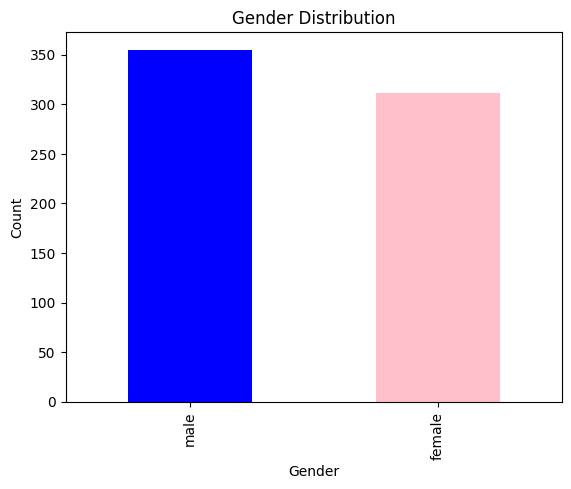

In [14]:
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


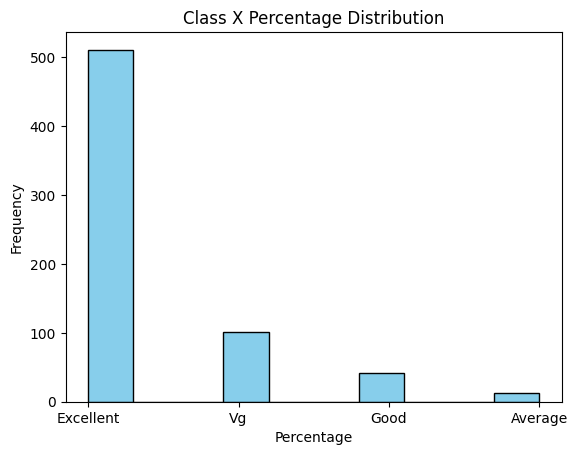

In [15]:
plt.hist(df['Class_X_Percentage'], bins=10, color='skyblue', edgecolor='black')
plt.title("Class X Percentage Distribution")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.show()


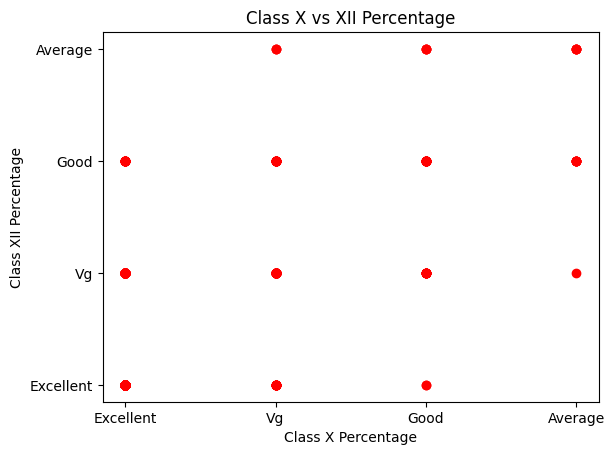

In [16]:
plt.scatter(df['Class_X_Percentage'], df['Class_XII_Percentage'], color='red')
plt.title("Class X vs XII Percentage")
plt.xlabel("Class X Percentage")
plt.ylabel("Class XII Percentage")
plt.show()


In [18]:
print(df_encoded.dtypes)


Gender                  object
Caste                   object
coaching                object
Class_ten_education     object
twelve_education        object
Class_X_Percentage       int64
Class_XII_Percentage     int64
Father_occupation        int64
Mother_occupation        int64
Performance              int64
medium_ENGLISH            bool
medium_OTHERS             bool
time_FOUR                 bool
time_ONE                  bool
time_SEVEN                bool
time_THREE                bool
time_TWO                  bool
dtype: object


In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:  # Encode only categorical columns
    df_encoded[col] = le.fit_transform(df[col])


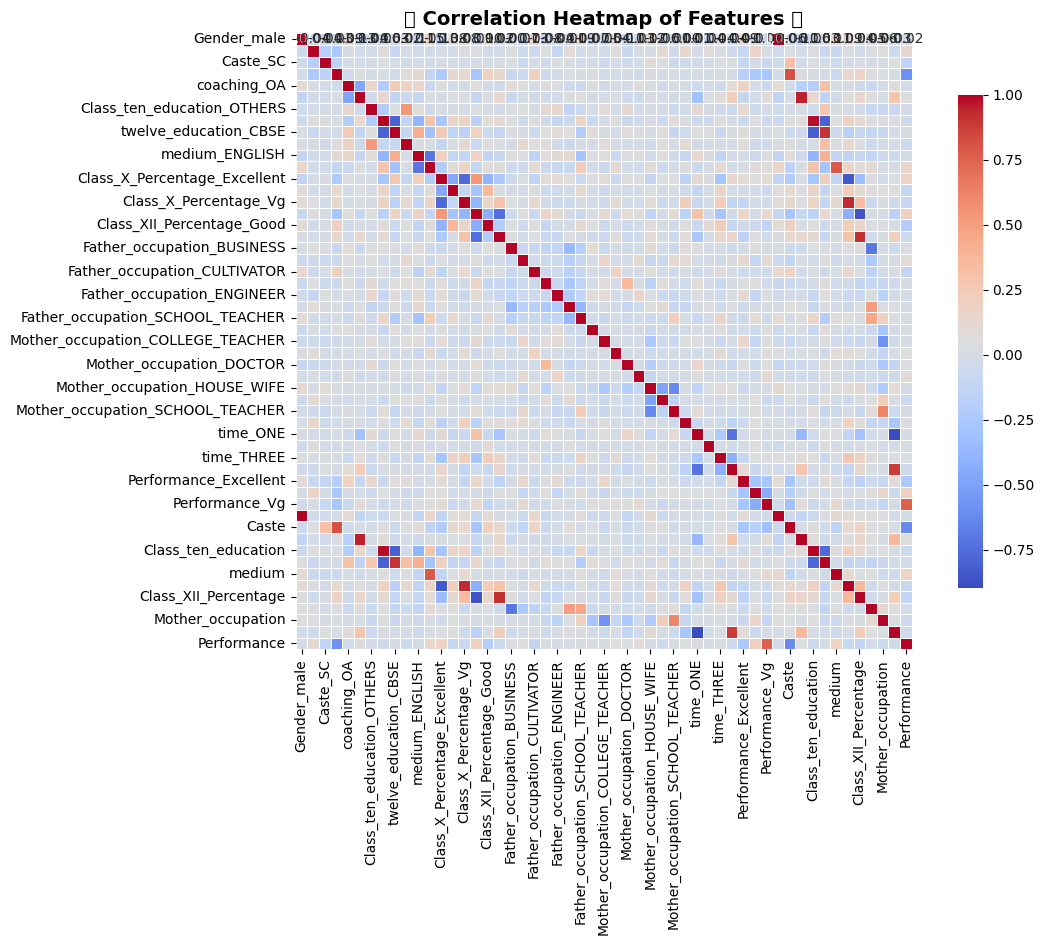

In [21]:
# Set figure size
plt.figure(figsize=(12, 8))
corr_matrix=df_encoded.corr()
# Create a heatmap with advanced styling
sns.heatmap(
    corr_matrix, 
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Choose a color theme
    fmt=".2f",  # Limit to 2 decimal places
    linewidths=0.5,  # Add grid lines
    square=True,  # Make the heatmap square
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    annot_kws={"size": 10}  # Change annotation text size
)

# Add title with styling
plt.title("🔥 Correlation Heatmap of Features 🔥", fontsize=14, fontweight='bold')

# Show plot
plt.show()



In [22]:
 df_encoded.describe()

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,0.533033,0.930931,1.448949,1.220721,0.459459,1.027027,1.345345,1.638138,4.666667,6.205706,3.897898,1.674174
std,0.499283,1.113703,0.835999,0.959757,0.522293,0.441313,0.754506,0.900953,2.216819,1.273689,1.383608,1.134752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,6.000000,2.000000,1.000000
50%,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,6.000000,6.000000,5.000000,2.000000
75%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,6.000000,7.000000,5.000000,3.000000
max,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,7.000000,8.000000,5.000000,3.000000


In [23]:
X = df_encoded.drop(columns=['Performance'])  # Features
y = df_encoded['Performance']  # Target variable


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [28]:

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9925373134328358
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        34
           3       1.00      0.98      0.99        42

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



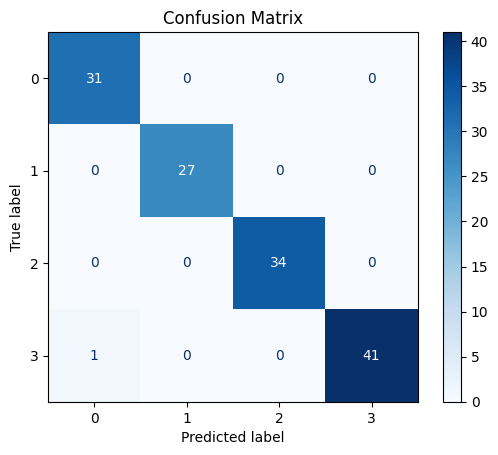

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### Observation:

Through this analysis, we observed several key insights into factors influencing student performance in entrance exams:

Coaching attendance appears to have a significant impact on student scores.

Certain demographic factors, such as caste and gender, show variations in performance trends, highlighting potential areas for educational interventions.

Students with strong academic backgrounds before the entrance exam tend to perform better.

Data-driven insights can help design targeted learning strategies to improve student outcomes.

This project serves as a foundation for further research in educational analytics and policy-making.



## Final Output

```
  Gender    Caste coaching Class_ten_education twelve_education   medium  \
0   male  General       NO                SEBA            AHSEC  ENGLISH   
1   male      OBC       WA                SEBA            AHSEC   OTHERS   
2   male      OBC       OA              OTHERS             CBSE  ENGLISH   
3   male  General       WA                SEBA            AHSEC   OTHERS   
4   male  General       OA                SEBA             CBSE  ENGLISH   

  Class_X_Percentage Class_XII_Percentage Father_occupation Mother_occupation  \
0          Excellent            Excellent            DOCTOR            OTHERS   
1          Excellent            Excellent    SCHOOL_TEACHER        HOUSE_WIFE   
2          Excellent            Excellent          BUSINESS        HOUSE_WIFE   
3          Excellent            Excellent    SCHOOL_TEACHER    SCHOOL_TEACHER   
4          Excellent            Excellent   COLLEGE_TEACHER        HOUSE_WIFE   

  time Performance  
0  ONE   Excellent  
1  TWO   Excellent  
2  TWO   Excellent  
3  ONE   Excellent  
4  TWO   Excellent  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB

(666, 12)
Index(['Gender', 'Caste', 'coaching', 'Class_ten_education',
       'twelve_education', 'medium', 'Class_X_Percentage',
       'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation',
       'time', 'Performance'],
      dtype='object')
Gender
male      355
female    311
Name: count, dtype: int64
Gender                  0
Caste                   0
coaching                0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
time                    0
Performance             0
dtype: int64
    coaching Class_ten_education twelve_education Class_X_Percentage  \
0         NO                SEBA            AHSEC          Excellent   
1         WA                SEBA            AHSEC          Excellent   
2         OA              OTHERS             CBSE          Excellent   
3         WA                SEBA            AHSEC          Excellent   
4         OA                SEBA             CBSE          Excellent   
..       ...                 ...              ...                ...   
661       WA                SEBA            AHSEC               Good   
662       WA                SEBA            AHSEC                 Vg   
663       WA                SEBA             CBSE               Good   
664       WA                SEBA            AHSEC               Good   
665       NO                SEBA             CBSE                 Vg   

    Class_XII_Percentage Father_occupation Mother_occupation   time  \
0              Excellent            DOCTOR            OTHERS    ONE   
1              Excellent    SCHOOL_TEACHER        HOUSE_WIFE    TWO   
2              Excellent          BUSINESS        HOUSE_WIFE    TWO   
3              Excellent    SCHOOL_TEACHER    SCHOOL_TEACHER    ONE   
4              Excellent   COLLEGE_TEACHER        HOUSE_WIFE    TWO   
..                   ...               ...               ...    ...   
661                   Vg            OTHERS        HOUSE_WIFE    ONE   
662                 Good        CULTIVATOR        HOUSE_WIFE  THREE   
663                   Vg            OTHERS    SCHOOL_TEACHER    TWO   
664                 Good    SCHOOL_TEACHER        HOUSE_WIFE  THREE   
665                 Good          BUSINESS            OTHERS    ONE   

    Performance  Gender_male  Caste_OBC  Caste_SC  Caste_ST  medium_ENGLISH  \
0     Excellent          1.0        0.0       0.0       0.0             1.0   
1     Excellent          1.0        1.0       0.0       0.0             0.0   
2     Excellent          1.0        1.0       0.0       0.0             1.0   
3     Excellent          1.0        0.0       0.0       0.0             0.0   
4     Excellent          1.0        0.0       0.0       0.0             1.0   
..          ...          ...        ...       ...       ...             ...   
661     Average          0.0        0.0       0.0       1.0             1.0   
662     Average          1.0        0.0       0.0       1.0             1.0   
663     Average          1.0        0.0       0.0       1.0             1.0   
664     Average          1.0        0.0       0.0       1.0             1.0   
665     Average          0.0        0.0       0.0       1.0             1.0   

     medium_OTHERS  
0              0.0  
1              1.0  
2              0.0  
3              1.0  
4              0.0  
..             ...  
661            0.0  
662            0.0  
663            0.0  
664            0.0  
665            0.0  

[666 rows x 15 columns]

Index(['coaching', 'Class_ten_education', 'twelve_education',
       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation', 'time', 'Performance', 'Gender_male', 'Caste_OBC',
       'Caste_SC', 'Caste_ST', 'medium_ENGLISH', 'medium_OTHERS'],
      dtype='object')
     Gender    Caste coaching Class_ten_education twelve_education   medium  \
0      male  General       NO                SEBA            AHSEC  ENGLISH   
1      male      OBC       WA                SEBA            AHSEC   OTHERS   
2      male      OBC       OA              OTHERS             CBSE  ENGLISH   
3      male  General       WA                SEBA            AHSEC   OTHERS   
4      male  General       OA                SEBA             CBSE  ENGLISH   
..      ...      ...      ...                 ...              ...      ...   
661  female       ST       WA                SEBA            AHSEC  ENGLISH   
662    male       ST       WA                SEBA            AHSEC  ENGLISH   
663    male       ST       WA                SEBA             CBSE  ENGLISH   
664    male       ST       WA                SEBA            AHSEC  ENGLISH   
665  female       ST       NO                SEBA             CBSE  ENGLISH   

    Class_X_Percentage Class_XII_Percentage Father_occupation  \
0            Excellent            Excellent            DOCTOR   
1            Excellent            Excellent    SCHOOL_TEACHER   
2            Excellent            Excellent          BUSINESS   
3            Excellent            Excellent    SCHOOL_TEACHER   
4            Excellent            Excellent   COLLEGE_TEACHER   
..                 ...                  ...               ...   
661               Good                   Vg            OTHERS   
662                 Vg                 Good        CULTIVATOR   
663               Good                   Vg            OTHERS   
664               Good                 Good    SCHOOL_TEACHER   
665                 Vg                 Good          BUSINESS   

    Mother_occupation   time Performance  
0              OTHERS    ONE   Excellent  
1          HOUSE_WIFE    TWO   Excellent  
2          HOUSE_WIFE    TWO   Excellent  
3      SCHOOL_TEACHER    ONE   Excellent  
4          HOUSE_WIFE    TWO   Excellent  
..                ...    ...         ...  
661        HOUSE_WIFE    ONE     Average  
662        HOUSE_WIFE  THREE     Average  
663    SCHOOL_TEACHER    TWO     Average  
664        HOUSE_WIFE  THREE     Average  
665            OTHERS    ONE     Average  

[666 rows x 12 columns]

  Gender    Caste coaching Class_ten_education twelve_education  \
0   male  General       NO                SEBA            AHSEC   
1   male      OBC       WA                SEBA            AHSEC   
2   male      OBC       OA              OTHERS             CBSE   
3   male  General       WA                SEBA            AHSEC   
4   male  General       OA                SEBA             CBSE   

   Class_X_Percentage  Class_XII_Percentage  Father_occupation  \
0                   1                     1                 55   
1                   1                     1                109   
2                   1                     1                103   
3                   1                     1                109   
4                   1                     1                 27   

   Mother_occupation  Performance  medium_ENGLISH  medium_OTHERS  time_FOUR  \
0                 72            1            True          False      False   
1                442            1           False           True      False   
2                442            1            True          False      False   
3                108            1           False           True      False   
4                442            1            True          False      False   

   time_ONE  time_SEVEN  time_THREE  time_TWO  
0      True       False       False     False  
1     False       False       False      True  
2     False       False       False      True  
3      True       False       False     False  
4     False       False       False      True  
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
Gender                  object
Caste                   object
coaching                object
Class_ten_education     object
twelve_education        object
Class_X_Percentage       int64
Class_XII_Percentage     int64
Father_occupation        int64
Mother_occupation        int64
Performance              int64
medium_ENGLISH            bool
medium_OTHERS             bool
time_FOUR                 bool
time_ONE                  bool
time_SEVEN                bool
time_THREE                bool
time_TWO                  bool
dtype: object

<Figure size 1200x800 with 2 Axes>
           Gender       Caste    coaching  Class_ten_education  \
count  666.000000  666.000000  666.000000           666.000000   
mean     0.533033    0.930931    1.448949             1.220721   
std      0.499283    1.113703    0.835999             0.959757   
min      0.000000    0.000000    0.000000             0.000000   
25%      0.000000    0.000000    1.000000             0.000000   
50%      1.000000    1.000000    2.000000             2.000000   
75%      1.000000    2.000000    2.000000             2.000000   
max      1.000000    3.000000    2.000000             2.000000   

       twelve_education      medium  Class_X_Percentage  Class_XII_Percentage  \
count        666.000000  666.000000          666.000000            666.000000   
mean           0.459459    1.027027            1.345345              1.638138   
std            0.522293    0.441313            0.754506              0.900953   
min            0.000000    0.000000            0.000000              0.000000   
25%            0.000000    1.000000            1.000000              1.000000   
50%            0.000000    1.000000            1.000000              1.000000   
75%            1.000000    1.000000            1.000000              3.000000   
max            2.000000    2.000000            3.000000              3.000000   

       Father_occupation  Mother_occupation        time  Performance  
count         666.000000         666.000000  666.000000   666.000000  
mean            4.666667           6.205706    3.897898     1.674174  
std             2.216819           1.273689    1.383608     1.134752  
min             0.000000           0.000000    0.000000     0.000000  
25%             3.000000           6.000000    2.000000     1.000000  
50%             6.000000           6.000000    5.000000     2.000000  
75%             6.000000           7.000000    5.000000     3.000000  
max             7.000000           8.000000    5.000000     3.000000  
RandomForestClassifier()
Accuracy: 0.9925373134328358
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        34
           3       1.00      0.98      0.99        42

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134


<Figure size 640x480 with 2 Axes>
```